# Analysis of the condition media experiments
---

## 0. Environmental setup

In [49]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RFC
from scipy.stats import pearsonr

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

---
## 1. Read in data

### 1.1. Condition media data

In [50]:
root_dir = "../data/condition_media/features_hmf3a_09_04_2021/"

condition_dapi_hp1_actin_features_2d = pd.read_csv(root_dir+"condition_media/dapi_hp1_actin_features_2d.csv", index_col=0)
condition_dapi_hp1_actin_features_3d = pd.read_csv(root_dir+"condition_media/dapi_hp1_actin_features_3d.csv", index_col=0)
condition_dapi_hp1_actin_features_3d.index = condition_dapi_hp1_actin_features_2d.index
#condition_dapi_hp1_actin_features = condition_dapi_hp1_actin_features_2d.join(condition_dapi_hp1_actin_features_3d, rsuffix="_3d")
condition_dapi_hp1_actin_features = condition_dapi_hp1_actin_features_2d
#scaler = StandardScaler()
#condition_dapi_hp1_actin_features = pd.DataFrame(scaler.fit_transform(condition_dapi_hp1_actin_features), index=condition_dapi_hp1_actin_features.index, columns=condition_dapi_hp1_actin_features.columns)

condition_dapi_hp1_actin_features["sample"] = np.repeat(1, len(condition_dapi_hp1_actin_features))
condition_dapi_hp1_actin_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,Solidity,A_R,Shape_Factor,Area_bbArea,Center_Mismatch,Smallest_largest_Calliper,Frac_Peri_w_posi_curvature,Frac_Peri_w_neg_curvature,Frac_Peri_w_polarity_changes,sample
HMF3A_condition_DAPI_HP1_Actin_1_0,0.011936,0.025222,217,0.098052,0.034952,0.033706,0.014270,7.025325,201,0.071429,...,0.990578,0.881363,1.137056,0.778791,1.095156,0.883041,0.376223,0.086101,0.406172,1
HMF3A_condition_DAPI_HP1_Actin_1_1,0.010535,0.026657,247,0.089717,0.035840,0.033706,0.013294,8.064003,225,0.058785,...,0.991193,0.941858,1.124644,0.776252,0.634644,0.936170,0.374448,0.148115,0.411061,1
HMF3A_condition_DAPI_HP1_Actin_1_2,0.010045,0.025950,259,0.089717,0.033869,0.033706,0.013040,8.196310,242,0.058785,...,0.991637,0.972432,1.120446,0.770340,1.834026,0.958974,0.384721,0.138309,0.411747,1
HMF3A_condition_DAPI_HP1_Actin_1_3,0.011125,0.024999,229,0.089717,0.033792,0.033706,0.013768,7.434307,220,0.067891,...,0.991476,0.967905,1.112400,0.782556,1.523982,0.960227,0.386750,0.112509,0.402572,1
HMF3A_condition_DAPI_HP1_Actin_2_0,0.009951,0.028701,218,0.098052,0.036022,0.033706,0.014815,8.681359,241,0.089717,...,0.991425,0.843735,1.131208,0.788260,1.266574,0.843902,0.382923,0.150945,0.346378,1


In [51]:
condition_dapi_hp1_h3k9me3_features_2d = pd.read_csv(root_dir+"condition_media/dapi_hp1_h3k9me3_features_2d.csv", index_col=0)
condition_dapi_hp1_h3k9me3_features_3d = pd.read_csv(root_dir+"condition_media/dapi_hp1_h3k9me3_features_3d.csv", index_col=0)
condition_dapi_hp1_h3k9me3_features_3d.index = condition_dapi_hp1_h3k9me3_features_2d.index
#condition_dapi_hp1_h3k9me3_features = condition_dapi_hp1_h3k9me3_features_2d.join(condition_dapi_hp1_h3k9me3_features_3d, rsuffix="_3d")
condition_dapi_hp1_h3k9me3_features = condition_dapi_hp1_h3k9me3_features_2d
#condition_dapi_hp1_h3k9me3_features = pd.DataFrame(scaler.fit_transform(condition_dapi_hp1_h3k9me3_features), index=condition_dapi_hp1_h3k9me3_features.index, columns=condition_dapi_hp1_h3k9me3_features.columns)

condition_dapi_hp1_h3k9me3_features["sample"] = np.repeat(2, len(condition_dapi_hp1_h3k9me3_features))
condition_dapi_hp1_h3k9me3_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,Solidity,A_R,Shape_Factor,Area_bbArea,Center_Mismatch,Smallest_largest_Calliper,Frac_Peri_w_posi_curvature,Frac_Peri_w_neg_curvature,Frac_Peri_w_polarity_changes,sample
HMF3A_condition_DAPI_HP1_H3K9me3_1_0,0.009964,0.030173,241,0.098052,0.038076,0.033706,0.016121,9.023916,237,0.071429,...,0.990461,0.849290,1.140180,0.793678,0.312817,0.845771,0.381801,0.177207,0.388245,2
HMF3A_condition_DAPI_HP1_H3K9me3_1_1,0.010845,0.029659,243,0.098052,0.036427,0.033706,0.015626,8.523987,234,0.071429,...,0.989982,0.910826,1.137175,0.769716,0.490262,0.907104,0.401118,0.161133,0.416546,2
HMF3A_condition_DAPI_HP1_H3K9me3_1_2,0.011550,0.028469,200,0.076800,0.038221,0.033706,0.015822,7.911799,207,0.067891,...,0.988662,0.972442,1.131668,0.778100,1.379070,0.964072,0.379448,0.148480,0.366617,2
HMF3A_condition_DAPI_HP1_H3K9me3_1_3,0.010354,0.027864,228,0.089717,0.036465,0.033706,0.014882,8.350503,229,0.075943,...,0.990865,0.978625,1.128207,0.777468,1.236708,0.968085,0.373852,0.150194,0.372220,2
HMF3A_condition_DAPI_HP1_H3K9me3_1_4,0.011018,0.032327,248,0.098052,0.038140,0.033706,0.018160,9.001040,236,0.071429,...,0.988838,0.789016,1.169856,0.762987,1.112780,0.781250,0.411951,0.190265,0.432897,2


In [52]:
condition_features = condition_dapi_hp1_actin_features.append(condition_dapi_hp1_h3k9me3_features)
condition_features.describe()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,Solidity,A_R,Shape_Factor,Area_bbArea,Center_Mismatch,Smallest_largest_Calliper,Frac_Peri_w_posi_curvature,Frac_Peri_w_neg_curvature,Frac_Peri_w_polarity_changes,sample
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.011125,0.029410,226.619048,0.092370,0.036965,0.034412,0.015434,8.498025,228.835979,0.079177,...,0.987479,0.845957,1.161683,0.766627,1.292264,0.842623,0.396851,0.151191,0.392494,1.566138
std,0.001444,0.005308,30.433444,0.015724,0.003053,0.002765,0.002137,1.665908,27.772050,0.039461,...,0.014851,0.109429,0.099405,0.034706,0.897619,0.104290,0.022507,0.033957,0.028067,0.496923
min,0.008445,0.022979,153.000000,0.071429,0.033056,0.033706,0.012537,6.061661,178.000000,0.037563,...,0.875029,0.449455,1.099685,0.565632,0.170855,0.455497,0.352940,0.055350,0.225366,1.000000
25%,0.010070,0.026936,206.000000,0.079597,0.035551,0.033706,0.014120,7.611415,214.000000,0.067891,...,0.989092,0.789016,1.128207,0.767691,0.710609,0.791878,0.381404,0.124678,0.375435,1.000000
50%,0.010638,0.028701,228.000000,0.089717,0.036508,0.033706,0.015144,8.334426,226.000000,0.071429,...,0.990155,0.871791,1.138685,0.774747,1.177526,0.869048,0.395399,0.150194,0.396150,2.000000
75%,0.011980,0.030808,247.000000,0.098052,0.037980,0.033706,0.016178,9.079361,241.000000,0.071429,...,0.990820,0.919857,1.157089,0.781171,1.709717,0.916201,0.411420,0.177207,0.409242,2.000000
max,0.016729,0.071184,341.000000,0.180047,0.060589,0.058785,0.029766,20.721415,370.000000,0.302582,...,0.992023,0.986775,1.803549,0.804234,7.120472,0.975155,0.469157,0.252196,0.462765,2.000000


----

### 1.2. Control data

In [53]:
control_dapi_hp1_actin_features_2d = pd.read_csv(root_dir+"control/dapi_hp1_actin_features_2d.csv", index_col=0)
control_dapi_hp1_actin_features_3d = pd.read_csv(root_dir+"control/dapi_hp1_actin_features_3d.csv", index_col=0)
control_dapi_hp1_actin_features_3d.index = control_dapi_hp1_actin_features_2d.index
#control_dapi_hp1_actin_features = control_dapi_hp1_actin_features_2d.join(control_dapi_hp1_actin_features_3d, rsuffix="_3d")
control_dapi_hp1_actin_features = control_dapi_hp1_actin_features_2d
#control_dapi_hp1_actin_features = pd.DataFrame(scaler.fit_transform(control_dapi_hp1_actin_features), index=control_dapi_hp1_actin_features.index, columns=control_dapi_hp1_actin_features.columns)

control_dapi_hp1_actin_features["sample"] = np.repeat(3, len(control_dapi_hp1_actin_features))
control_dapi_hp1_actin_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,Solidity,A_R,Shape_Factor,Area_bbArea,Center_Mismatch,Smallest_largest_Calliper,Frac_Peri_w_posi_curvature,Frac_Peri_w_neg_curvature,Frac_Peri_w_polarity_changes,sample
HMF3A_control_DAPI_HP1_Actin_1_0,0.009503,0.030467,300,0.098052,0.037883,0.033706,0.015740,9.319320,246,0.071429,...,0.990954,0.856136,1.153471,0.770372,2.008238,0.855140,0.371603,0.173717,0.453174,3
HMF3A_control_DAPI_HP1_Actin_1_1,0.009761,0.052624,250,0.309017,0.045198,0.033706,0.043047,10.802329,239,0.285714,...,0.982424,0.940528,1.206400,0.764014,1.825691,0.890547,0.376710,0.152891,0.394048,3
HMF3A_control_DAPI_HP1_Actin_1_2,0.010402,0.033579,213,0.103945,0.041591,0.037563,0.018549,9.108443,219,0.098052,...,0.985593,0.605325,1.254768,0.776422,1.615237,0.622642,0.372748,0.165098,0.362535,3
HMF3A_control_DAPI_HP1_Actin_1_3,0.010446,0.030719,235,0.086867,0.037943,0.033706,0.015162,8.992443,237,0.071429,...,0.989235,0.721474,1.180806,0.791369,2.623220,0.720588,0.398033,0.174664,0.394674,3
HMF3A_control_DAPI_HP1_Actin_1_4,0.013647,0.028545,164,0.098052,0.037315,0.037563,0.016443,7.276508,195,0.080557,...,0.988380,0.820068,1.142844,0.792954,1.387155,0.813333,0.425416,0.135261,0.357786,3


In [69]:
control_dapi_hp1_h3k9me3_features_2d = pd.read_csv(root_dir+"control/dapi_hp1_h3k9me3_features_2d.csv", index_col=0)
control_dapi_hp1_h3k9me3_features_3d = pd.read_csv(root_dir+"control/dapi_hp1_h3k9me3_features_3d.csv", index_col=0)
control_dapi_hp1_h3k9me3_features_3d.index = control_dapi_hp1_h3k9me3_features_2d.index
#control_dapi_hp1_h3k9me3_features = control_dapi_hp1_h3k9me3_features_2d.join(control_dapi_hp1_h3k9me3_features_3d, rsuffix="_3d")
control_dapi_hp1_h3k9me3_features = control_dapi_hp1_h3k9me3_features_2d
#control_dapi_hp1_h3k9me3_features = pd.DataFrame(scaler.fit_transform(control_dapi_hp1_h3k9me3_features), index=control_dapi_hp1_h3k9me3_features.index, columns=control_dapi_hp1_h3k9me3_features.columns)

control_dapi_hp1_h3k9me3_features["sample"] = np.repeat(4, len(control_dapi_hp1_h3k9me3_features))
control_dapi_hp1_h3k9me3_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,Solidity,A_R,Shape_Factor,Area_bbArea,Center_Mismatch,Smallest_largest_Calliper,Frac_Peri_w_posi_curvature,Frac_Peri_w_neg_curvature,Frac_Peri_w_polarity_changes,sample
HMF3A_control_DAPI_HP1_H3K9me3_1_0,0.011213,0.028490,235,0.089717,0.036767,0.033706,0.014955,8.125574,221,0.071429,...,0.990054,0.835929,1.144165,0.774689,0.794517,0.833333,0.392073,0.147249,0.416910,4
HMF3A_control_DAPI_HP1_H3K9me3_1_1,0.011572,0.029061,202,0.098052,0.037284,0.033706,0.014662,8.127886,218,0.071429,...,0.990049,0.858428,1.134518,0.780988,0.964684,0.858757,0.399434,0.153911,0.370118,4
HMF3A_control_DAPI_HP1_H3K9me3_1_2,0.009885,0.031832,261,0.098052,0.038503,0.033706,0.018401,9.356219,243,0.067891,...,0.989331,0.976078,1.143780,0.757561,0.756294,0.964286,0.378650,0.182313,0.406698,4
HMF3A_control_DAPI_HP1_H3K9me3_1_3,0.011068,0.031978,233,0.098052,0.039000,0.033706,0.017366,8.852932,227,0.071429,...,0.988640,0.932219,1.152306,0.766391,1.468582,0.920455,0.399659,0.193667,0.410222,4
HMF3A_control_DAPI_HP1_H3K9me3_1_4,0.010583,0.030126,243,0.098052,0.037743,0.033706,0.015029,8.907415,236,0.071429,...,0.989771,0.969810,1.138002,0.773552,0.418346,0.961749,0.394226,0.178738,0.405919,4


In [70]:
control_dapi_hp1_lamin_features_2d = pd.read_csv(root_dir+"control/dapi_hp1_lamin_features_2d.csv", index_col=0)
control_dapi_hp1_lamin_features_3d = pd.read_csv(root_dir+"control/dapi_hp1_lamin_features_3d.csv", index_col=0)
control_dapi_hp1_lamin_features_3d.index = control_dapi_hp1_lamin_features_2d.index
#control_dapi_hp1_lamin_features = control_dapi_hp1_lamin_features_2d.join(control_dapi_hp1_lamin_features_3d, rsuffix="_3d")
control_dapi_hp1_lamin_features = control_dapi_hp1_lamin_features_2d
#control_dapi_hp1_lamin_features = pd.DataFrame(scaler.fit_transform(control_dapi_hp1_lamin_features), index=control_dapi_hp1_lamin_features.index, columns=control_dapi_hp1_lamin_features.columns)

control_dapi_hp1_lamin_features["sample"] = np.repeat(5, len(control_dapi_hp1_lamin_features))
control_dapi_hp1_lamin_features.head()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,Solidity,A_R,Shape_Factor,Area_bbArea,Center_Mismatch,Smallest_largest_Calliper,Frac_Peri_w_posi_curvature,Frac_Peri_w_neg_curvature,Frac_Peri_w_polarity_changes,sample
HMF3A_control_DAPI_HP1_Lamin_1_0,0.011140,0.034317,195,0.106286,0.040049,0.036495,0.018066,9.251247,231,0.079597,...,0.988989,0.748818,1.182405,0.739748,2.263702,0.742105,0.408159,0.208497,0.344550,5
HMF3A_control_DAPI_HP1_Lamin_1_1,0.012516,0.031641,181,0.116547,0.040448,0.037563,0.018051,8.008750,198,0.098052,...,0.987747,0.799028,1.150866,0.766916,1.745327,0.795181,0.396406,0.162166,0.362372,5
HMF3A_control_DAPI_HP1_Lamin_1_2,0.010152,0.033645,220,0.098052,0.038968,0.037563,0.017566,9.742006,250,0.098052,...,0.986438,0.576175,1.281645,0.793177,1.529550,0.580357,0.408325,0.182930,0.359326,5
HMF3A_control_DAPI_HP1_Lamin_1_3,0.011296,0.060173,259,0.354474,0.051251,0.037563,0.043332,15.323937,299,0.324414,...,0.984285,0.626107,1.355971,0.688830,1.028126,0.635628,0.417751,0.210971,0.361865,5
HMF3A_control_DAPI_HP1_Lamin_2_0,0.009677,0.062732,200,0.255397,0.056460,0.040807,0.039093,14.115071,250,0.270004,...,0.984981,0.985740,1.275206,0.769704,2.310231,0.966851,0.397701,0.244984,0.318161,5


In [71]:
control_features = control_dapi_hp1_actin_features.append(control_dapi_hp1_h3k9me3_features).append(control_dapi_hp1_lamin_features)
control_features.describe()

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,Solidity,A_R,Shape_Factor,Area_bbArea,Center_Mismatch,Smallest_largest_Calliper,Frac_Peri_w_posi_curvature,Frac_Peri_w_neg_curvature,Frac_Peri_w_polarity_changes,sample
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.010597,0.034996,235.456954,0.116575,0.040625,0.036132,0.019169,10.038745,241.344371,0.103018,...,0.987427,0.863495,1.189898,0.767602,1.767417,0.858695,0.393201,0.182775,0.383250,3.841060
std,0.001430,0.014368,36.642066,0.064951,0.009553,0.007116,0.009267,5.474231,37.592773,0.067872,...,0.009112,0.097352,0.180300,0.024939,1.125137,0.093089,0.021997,0.029753,0.030592,0.791086
min,0.006146,0.026013,136.000000,0.071429,0.034216,0.027695,0.012719,6.979713,187.000000,0.047379,...,0.873149,0.471047,1.108838,0.607002,0.072188,0.505051,0.340416,0.119585,0.284180,3.000000
25%,0.009731,0.029489,211.000000,0.094964,0.037167,0.033706,0.015596,8.650772,225.000000,0.071429,...,0.987760,0.819188,1.139455,0.763542,1.016035,0.814369,0.377889,0.164210,0.365547,3.000000
50%,0.010419,0.031452,234.000000,0.098052,0.038666,0.033706,0.016950,9.173910,236.000000,0.075943,...,0.989482,0.888117,1.154044,0.773757,1.585065,0.885822,0.391687,0.178836,0.385890,4.000000
75%,0.011219,0.034548,256.000000,0.112288,0.040669,0.037563,0.018670,9.819629,249.750000,0.098052,...,0.990314,0.934129,1.177184,0.780876,2.305554,0.925469,0.404381,0.197340,0.405623,4.000000
max,0.019773,0.156837,454.000000,0.585786,0.129956,0.112342,0.086013,75.244441,579.000000,0.472136,...,0.991966,0.992527,3.255613,0.817387,10.753467,0.984962,0.497100,0.325390,0.468111,5.000000


---

## 2. Data preprocessing

We will now preprocess the data for the downstream analyses.

### 2.1. Remove constant and NA samples

In [72]:
# Remove constant features for control data
cleaned_control_features = control_features.loc[:, (control_features != control_features.iloc[0]).any()]
cleaned_control_features = cleaned_control_features.dropna(axis=1, how='all')
# Remove rows with missing entries in the control data
cleaned_control_features = cleaned_control_features.dropna(axis=0)
print("{} rows and {} columns were dropped for the control data.".format(str(len(control_features)-len(cleaned_control_features)), str(len(control_features.columns)-len(cleaned_control_features.columns))))

0 rows and 6 columns were dropped for the control data.


In [73]:
# Remove constant features for control data
cleaned_condition_features = condition_features.loc[:, (condition_features != condition_features.iloc[0]).any()]
cleaned_condition_features = cleaned_condition_features.dropna(axis=1, how='all')
# Remove rows with missing entries in the control data
cleaned_condition_features = cleaned_condition_features.dropna(axis=0)
print("{} rows and {} columns were dropped for the control data.".format(str(len(condition_features)-len(cleaned_condition_features)), str(len(condition_features.columns)-len(cleaned_condition_features.columns))))

4 rows and 6 columns were dropped for the control data.


### 2.2. Remove highly correlated features


In [74]:
# Maintain features that have at most a Pearson correlation of 0.75
threshold = 0.70
all_data = cleaned_control_features.append(cleaned_condition_features)
sample_labels = np.array(all_data["sample"])
# Control data
all_data_corr_matrix = all_data.corr().abs()
upper = all_data_corr_matrix.where(np.triu(np.ones(all_data_corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)] + ["label"] +["bbox-1"] + ["sample"]
len(to_drop)

161

We drop 210 of the features that show a high autocorrelation (larger than 0.7) plus 2 that are artifacts from the segmentation.

In [76]:
cleaned_all_data = all_data.drop(to_drop, axis=1)
# hp1_features = []
# for c in cleaned_all_data.columns:
#     if "hp1" in c:
#         hp1_features.append(c)
        
# cleaned_all_data = cleaned_all_data.drop(hp1_features, axis=1)

cleaned_all_data.describe()

,Avg_Curvature,Std_Curvature,nPolarity_changes,num_prominant_positive_curvature,width_prominant_positive_curvature,width_prominant_negative_curvature,Min_Calliper,Std_Radius,Int_Min,Int_Max,...,weighted_moments_hu-5,weighted_moments_hu-6,moments_normalized-0-2,moments_normalized-0-3,moments_normalized-2-3,moments_central-0-1,moments_central-1-0,Center_Mismatch,Frac_Peri_w_posi_curvature,Frac_Peri_w_polarity_changes
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,4.870000e+02,4.870000e+02,487.000000,487.000000,4.870000e+02,4.870000e+02,4.870000e+02,487.000000,487.000000,487.000000
mean,0.010777,0.032904,232.215606,7.125257,6.614676,6.621262,163.275154,5.428496,13.157097,227.503728,...,2.276871e-15,2.988342e-23,0.080191,0.000135,-6.116994e-08,3.177521e-11,5.907112e-11,1.586823,0.394341,0.386429
std,0.001412,0.012073,34.295867,4.079801,4.005029,0.830543,22.022768,4.840986,6.955511,30.381279,...,1.189265e-14,1.224329e-21,0.012062,0.001021,1.005462e-04,5.105663e-10,1.689612e-09,1.069115,0.021805,0.029661
min,0.006146,0.022979,136.000000,1.000000,5.035353,5.182307,87.000000,0.593048,4.300726,123.732597,...,-6.600913e-14,-1.142788e-20,0.046577,-0.004720,-4.771484e-04,-2.459615e-09,-5.586344e-09,0.072188,0.340416,0.225366
25%,0.009914,0.028398,209.500000,4.000000,5.642565,6.060382,150.000000,2.541922,8.687734,209.666672,...,-2.130463e-16,-2.015974e-23,0.073891,-0.000215,-3.464781e-05,-2.344223e-10,-1.090910e-09,0.942680,0.378507,0.369675
50%,0.010527,0.030613,231.000000,7.000000,6.045298,6.522684,165.000000,4.184725,10.804236,236.257248,...,5.457281e-17,-3.380279e-27,0.079181,0.000049,-2.543240e-06,5.258016e-12,6.002665e-11,1.420939,0.391990,0.388998
75%,0.011507,0.032941,251.000000,9.000000,6.536032,7.041853,179.000000,6.666591,13.984981,255.000000,...,1.108422e-15,2.208881e-23,0.085245,0.000400,2.396804e-05,2.318501e-10,1.094030e-09,2.030810,0.408681,0.407760
max,0.019773,0.156837,454.000000,32.000000,60.570096,11.334792,220.000000,47.740609,39.542126,255.000000,...,1.768794e-13,1.246009e-20,0.184493,0.015158,1.019143e-03,3.852733e-09,5.499828e-09,10.753467,0.497100,0.468111


In [77]:
np.unique(cleaned_all_data.columns)

array(['Avg_Curvature', 'Center_Mismatch', 'Entropy',
       'Frac_Peri_w_polarity_changes', 'Frac_Peri_w_posi_curvature',
       'HC_content_EC_content', 'I80_I20', 'Int_Max', 'Int_Min',
       'Min_Calliper', 'Std_Curvature', 'Std_Radius', 'correlation_5',
       'moments_central-0-1', 'moments_central-1-0',
       'moments_normalized-0-2', 'moments_normalized-0-3',
       'moments_normalized-2-3', 'nHigh_nLow', 'nPolarity_changes',
       'num_prominant_positive_curvature', 'orientation',
       'weighted_moments_central-0-1', 'weighted_moments_central-0-3',
       'weighted_moments_central-1-0', 'weighted_moments_central-1-1',
       'weighted_moments_central-1-2', 'weighted_moments_hu-2',
       'weighted_moments_hu-3', 'weighted_moments_hu-4',
       'weighted_moments_hu-5', 'weighted_moments_hu-6',
       'weighted_moments_normalized-0-3',
       'weighted_moments_normalized-1-1',
       'weighted_moments_normalized-1-2',
       'weighted_moments_normalized-2-1',
       'weighte

In [78]:
labels = list(np.repeat("ctrl", len(cleaned_control_features))) + list(np.repeat("trt", len(cleaned_condition_features)))
labels = np.array(labels)
numeric_labels = np.array(pd.Series(labels).map({"ctrl":0, "trt":1}))
Counter(labels)

Counter({'ctrl': 302, 'trt': 185})

In [79]:
sample_changes = list(Counter(sample_labels).values())

---

## 3. Data visualization

We will now visualize the cleaned data that consists of 52 features after our filtering and 302 samples of the control conditiona nd 185 samples of the treatment condition.

### 3.1. tSNE visualization

In [80]:
random.seed(1234)
tsne = TSNE(n_components=2, perplexity=30, random_state=1234)
scaled_cleaned_all_data = StandardScaler().fit_transform(cleaned_all_data)
embedded_cleaned_data = tsne.fit_transform(scaled_cleaned_all_data)

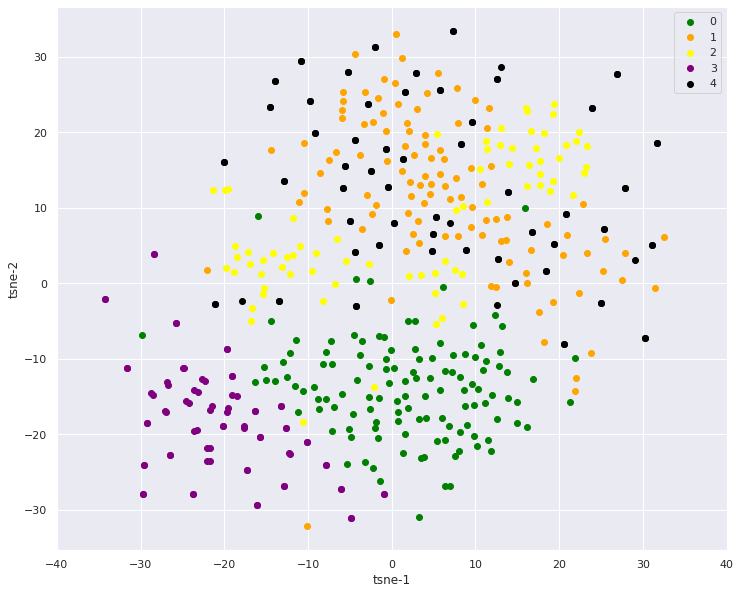

In [81]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(111)

x = embedded_cleaned_data[:,0]
y = embedded_cleaned_data[:,1]
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
colors = ["green", "orange", "yellow", "purple", "black"]
j = 0
for i in range(len(sample_changes)):
    end = j + sample_changes[i]
    scatter = ax.scatter(x[j:end], y[j:end], c=colors[i], label=str(i))
    j = end
ax.set_xlim([-40,40])
ax.legend()
plt.show()

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(111)

x = embedded_cleaned_data[:,0]
y = embedded_cleaned_data[:,1]
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")

scatter = ax.scatter(x[:len(cleaned_control_features)], y[:len(cleaned_control_features)], c="blue", label="ctrl")
scatter = ax.scatter(x[len(cleaned_control_features):], y[len(cleaned_control_features):], c="red", label="trt")
ax.legend()
plt.show()

### 3.2. PCA visualization

In [ ]:
pca = PCA(n_components=2, random_state=1234)
embedded_cleaned_data = pca.fit_transform(scaled_cleaned_all_data)
expl_var_ratio = pca.explained_variance_ratio_

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(111)

x = embedded_cleaned_data[:,0]
y = embedded_cleaned_data[:,1]
ax.set_xlabel("pc1 ({}%)".format(np.round(expl_var_ratio[0]*100,2)))
ax.set_ylabel("pc2 ({}%)".format(np.round(expl_var_ratio[1]*100,2)))

scatter = ax.scatter(x[:len(cleaned_control_features)], y[:len(cleaned_control_features)], c="blue", label="ctrl")
scatter = ax.scatter(x[len(cleaned_control_features):], y[len(cleaned_control_features):], c="red", label="trt")
ax.legend()
plt.show()

## 4. Differences between the two conditions

We will now assess how dissimilar the treatment and the control condition samples are.

### 4.1. Random Forest classification

We fit a RandomForest classifier to see how well this algorithm often used as a baseline approach can separate the treatment from the control samples and in particular which features are most valuable for distinguishing those.

In [ ]:
def plot_roc_for_stratified_cv(X, y, n_splits, classifier, title):
    cv = StratifiedKFold(n_splits=n_splits)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(12, 10))
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title=title)
    ax.legend(loc="lower right")
    return fig, ax, classifier

In [ ]:
rfc = RFC(n_estimators=100, random_state=1234, n_jobs=5, class_weight="balanced")

_, _, fitted_rfc = plot_roc_for_stratified_cv(scaled_cleaned_all_data, labels, 5, rfc, "ROC for RFC trained on scaled cleaned data")

We see that a the classifier can almost perfectly distinguish between the samples from the two conditions with an average ROC of 0.98 (+/- 0.03) for the 5 fold.

In [ ]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,10))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()

In [ ]:
plot_feature_importance(fitted_rfc.feature_importances_, cleaned_all_data.columns, "RFC ")

We see that the DAPI minimum intensity, the maximum HP1 intensity alongside with the HC/EC content are the most discriminative features for the RFC.

### 4.2. Hypothesis testing

We will now test all of the 52 features we have left with respect to their significance in the differences between the control and treatment condition using the Wilcoxon rank sum test.

In [ ]:
def ranksum_screen(data, labels):
    unique_labels = np.unique(labels)
    data = np.array(data)
    x = data[labels==unique_labels[0],:]
    y = data[labels==unique_labels[1],:]
    
    pvalues = []
    for i in range(x.shape[1]):
        pvalues.append(stats.ranksums(x[:,i], y[:,i])[1])
    return np.array(pvalues)

In [ ]:
pvalues = ranksum_screen(cleaned_all_data, labels)

In [ ]:
alpha = 0.01
fwer_pvalues = pvalues/len(cleaned_all_data.columns)
sign_idc = fwer_pvalues<0.01
significant_features = np.array(cleaned_all_data.columns)[sign_idc]

sign_fwer_features = dict(zip(significant_features, fwer_pvalues[sign_idc]))
sign_fwer_features = {k: v for k, v in sorted(sign_fwer_features.items(), key=lambda item: item[1])}
sign_fwer_features

We find the most significantly different features are very similar to the ones the RFC identified as most important which is not surprising.

### 4.3. Differences in volume and HP1 intensity

In [ ]:
labeled_all_data = all_data.copy()
labeled_all_data["label"] = labels

In [ ]:
ax = sns.boxplot(x="label", y="rel_hp1_int", data=labeled_all_data)
ax = sns.swarmplot(x="label", y="rel_hp1_int", data=labeled_all_data, color=".25", alpha=0.4, size=2)
x1, x2 = 0, 1
y, h, col = labeled_all_data['rel_hp1_int'].max()+4 , 4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "<0.001", ha='center', va='bottom', color=col)
plt.show()

In [ ]:
volume_pvalue = stats.ranksums(np.array(labeled_all_data.loc[labeled_all_data["label"] == "trt", "nuclear_volume"]), np.array(labeled_all_data.loc[labeled_all_data["label"] == "ctrl", "nuclear_volume"]))[1]
volume_pvalue

In [ ]:
ax = sns.boxplot(x="label", y="nuclear_volume", data=labeled_all_data)
ax = sns.swarmplot(x="label", y="nuclear_volume", data=labeled_all_data, color=".25", alpha=0.4, size=2)
x1, x2 = 0, 1
y, h, col = labeled_all_data['nuclear_volume'].max()+4 , 4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)
plt.show()